<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1d8lmQCL40i0rGj_qMFjj5dUXdQYR_ixe" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Reconocimiento de caras

In [11]:
urls=[
      "https://media.vogue.mx/photos/5cfe891727998c247198c76d/2:3/w_2560%2Cc_limit/GettyImages-1153799667.jpg",
      "https://images.ecestaticos.com/G8wdPYdInsxwj0lphX-c3fufnBM=/0x0:1600x900/1200x1200/filters:fill(white):format(jpg)/f.elconfidencial.com%2Foriginal%2Fadb%2F6a7%2F61d%2Fadb6a761d98cd48693a79ea75b2db8c6.jpg",
      "https://hips.hearstapps.com/hmg-prod/images/jennifer-lawrence-attends-the-anatomie-dune-chute-red-news-photo-1704650471.jpg?crop=1.00xw:0.668xh;0,0.0887xh&resize=640:*",
      "https://aws-modapedia.vogue.es/prod/designs/v1/assets/640x1179/1783.jpg",
      "https://media.revistavanityfair.es/photos/60e850f3a9295aeb634d0a78/master/w_1600%2Cc_limit/14289.jpg",
      "https://s3.abcstatics.com/media/estilo/2021/12/07/apertura-lawrence-ksoC--1248x698@abc.jpg",
      "https://media.revistavanityfair.es/photos/60e8406c70839211f5444c64/master/w_1600%2Cc_limit/151864.jpg",
      "https://e00-telva.uecdn.es/imagenes/2015/11/27/celebrities/1448615201_extras_noticia_head_moviles_1.jpg",
      "https://m.media-amazon.com/images/M/MV5BOTU3NDE5MDQ4MV5BMl5BanBnXkFtZTgwMzE5ODQ3MDI@._V1_.jpg",
      "https://www.hola.com/horizon/landscape/460ea095764e-jennifer-lawrence.jpg",
      "https://cdn.hobbyconsolas.com/sites/navi.axelspringer.es/public/media/image/2024/04/jennifer-lawrence-3298462.jpg?tf=3840x"
     ]


<ipython-input-12-e091846ea974>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((max_width, height), Image.ANTIALIAS)


https://media.vogue.mx/photos/5cfe891727998c247198c76d/2:3/w_2560%2Cc_limit/GettyImages-1153799667.jpg
Cara detectada con probabilidad: 0.8462733030319214


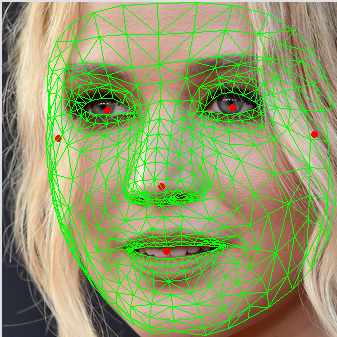

https://images.ecestaticos.com/G8wdPYdInsxwj0lphX-c3fufnBM=/0x0:1600x900/1200x1200/filters:fill(white):format(jpg)/f.elconfidencial.com%2Foriginal%2Fadb%2F6a7%2F61d%2Fadb6a761d98cd48693a79ea75b2db8c6.jpg
Cara detectada con probabilidad: 0.9013363122940063


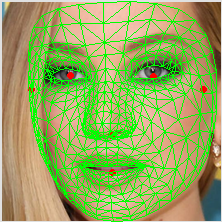

https://hips.hearstapps.com/hmg-prod/images/jennifer-lawrence-attends-the-anatomie-dune-chute-red-news-photo-1704650471.jpg?crop=1.00xw:0.668xh;0,0.0887xh&resize=640:*
Cara detectada con probabilidad: 0.8622948527336121


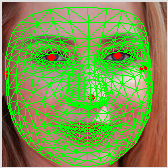

https://aws-modapedia.vogue.es/prod/designs/v1/assets/640x1179/1783.jpg
Cara detectada con probabilidad: 0.8926213383674622


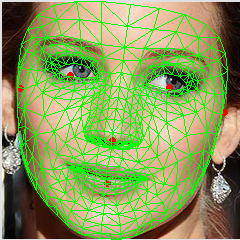

https://media.revistavanityfair.es/photos/60e850f3a9295aeb634d0a78/master/w_1600%2Cc_limit/14289.jpg
Cara detectada con probabilidad: 0.9030312895774841


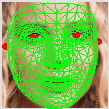

https://s3.abcstatics.com/media/estilo/2021/12/07/apertura-lawrence-ksoC--1248x698@abc.jpg
Cara detectada con probabilidad: 0.9010499119758606


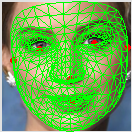

https://media.revistavanityfair.es/photos/60e8406c70839211f5444c64/master/w_1600%2Cc_limit/151864.jpg
Cara detectada con probabilidad: 0.8357338905334473


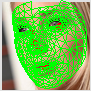

https://e00-telva.uecdn.es/imagenes/2015/11/27/celebrities/1448615201_extras_noticia_head_moviles_1.jpg
Cara detectada con probabilidad: 0.885970950126648


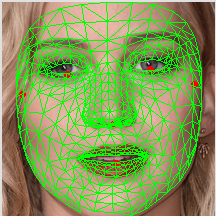

https://m.media-amazon.com/images/M/MV5BOTU3NDE5MDQ4MV5BMl5BanBnXkFtZTgwMzE5ODQ3MDI@._V1_.jpg
Cara detectada con probabilidad: 0.8819714784622192


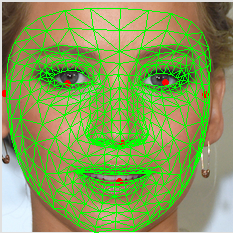

https://www.hola.com/horizon/landscape/460ea095764e-jennifer-lawrence.jpg
Cara detectada con probabilidad: 0.805316150188446


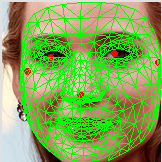

https://cdn.hobbyconsolas.com/sites/navi.axelspringer.es/public/media/image/2024/04/jennifer-lawrence-3298462.jpg?tf=3840x
Cara detectada con probabilidad: 0.7056527733802795


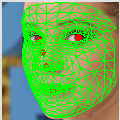

In [12]:

!pip -q install mediapipe opencv-python-headless pillow requests

import cv2
import mediapipe as mp
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Inicializa FaceLandmarker
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

# Función para descargar una imagen desde una URL
def download_image(url, max_width=500):
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        try:
            img = Image.open(BytesIO(response.content)).convert('RGB')

            # Redimensionar la imagen si es necesario
            if img.width > max_width:
                ratio = max_width / float(img.width)
                height = int((float(img.height) * float(ratio)))
                img = img.resize((max_width, height), Image.ANTIALIAS)

            return np.array(img)
        except UnidentifiedImageError:
            print(f"Unable to identify image format for URL: {url}")
            return None
    else:
        print(f"Failed to download image from URL: {url}. Status code: {response.status_code}")
        return None

# Procesa cada URL
for url in urls:
    # Descarga la imagen
    image_np = download_image(url)

    if image_np is None: continue;

    # Convertir imagen a formato de OpenCV
    image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    print(url)

    # Detectar caras en la imagen
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(image_cv)

        if results.detections:
            # Extraer la cara con mayor probabilidad (primer resultado)
            detection = results.detections[0]
            print(f"Cara detectada con probabilidad: {detection.score[0]}")

            # Dibujar detección en la imagen
            mp_drawing.draw_detection(image_cv, detection)

            # Extraer coordenadas de la caja de la cara
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = image_cv.shape
            x1, y1 = int(bboxC.xmin * iw), int(bboxC.ymin * ih)
            x2, y2 = x1 + int(bboxC.width * iw), y1 + int(bboxC.height * ih)
            face_image = image_cv[y1:y2, x1:x2]

            # Convertir la imagen de la cara extraída a RGB
            face_image_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)

            # Calcular los puntos de referencia faciales usando FaceMesh
            with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True) as face_mesh:
                face_results = face_mesh.process(face_image_rgb)

                if face_results.multi_face_landmarks:
                    for face_landmarks in face_results.multi_face_landmarks:
                        mp_drawing.draw_landmarks(
                            image=face_image_rgb,
                            landmark_list=face_landmarks,
                            connections=mp_face_mesh.FACEMESH_TESSELATION,
                            landmark_drawing_spec=None,
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1)
                        )

                    # Mostrar imagen de la cara con puntos de referencia dibujados
                    final_image = Image.fromarray(face_image_rgb)
                    display(final_image)
        else:
          print("\t","No hay caras")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


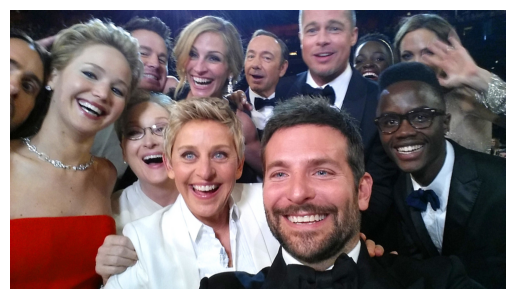

[True]


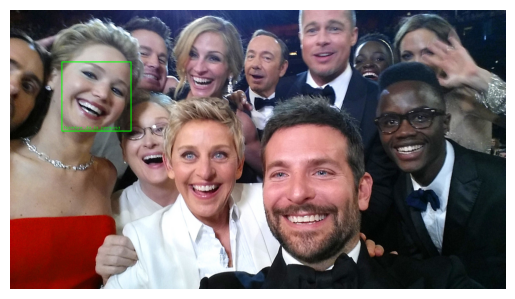

In [13]:
# Instalar las dependencias necesarias
!pip -q install opencv-python-headless
!pip -q install dlib
!pip -q install face_recognition

import cv2
import dlib
import face_recognition
import urllib.request
import numpy as np
from matplotlib import pyplot as plt

# Descargar imágenes desde URLs y preparar el dataset
def download_image(url):
    response = urllib.request.urlopen(url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

def prepare_training_images(urls):
    training_images = []
    for url in urls:
        image = download_image(url)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        training_images.append(rgb_image)
    return training_images

training_images = prepare_training_images(urls)

# Codificar el rostro en las imágenes de entrenamiento
known_face_encodings = []

for image in training_images:
    face_encodings = face_recognition.face_encodings(image)
    if face_encodings:
        known_face_encodings.append(face_encodings[0])

# Promediar las codificaciones faciales
if known_face_encodings:
    person_face_encoding = np.mean(known_face_encodings, axis=0)
else:
    raise ValueError("No se encontraron rostros en las imágenes de entrenamiento")

# Reconocer el rostro entrenado en una nueva imagen con múltiples personas
def recognize_faces_in_image(image_url, known_face_encoding, person_name="Jennifer"):
    image_to_recognize = download_image(image_url)
    rgb_image_to_recognize = cv2.cvtColor(image_to_recognize, cv2.COLOR_BGR2RGB)

    face_locations = face_recognition.face_locations(rgb_image_to_recognize)
    face_encodings = face_recognition.face_encodings(rgb_image_to_recognize, face_locations)

    plt.axis("off")
    plt.imshow(rgb_image_to_recognize)
    plt.show()

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        match = face_recognition.compare_faces([known_face_encoding], face_encoding)
        name = "Desconocido"

        if match[0]:
            name = person_name
            cv2.rectangle(rgb_image_to_recognize, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(rgb_image_to_recognize, name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    plt.axis("off")
    plt.imshow(rgb_image_to_recognize)
    plt.show()

# URL de la imagen con múltiples personas
test_image_url = "https://img.buzzfeed.com/buzzfeed-static/static/2018-03/1/15/asset/buzzfeed-prod-fastlane-02/sub-buzz-31755-1519935310-2.jpg?downsize=1600"
recognize_faces_in_image(test_image_url, person_face_encoding, person_name="Nombre_de_la_persona")
